In [53]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.special import comb 
import seaborn as sns
sns.set_theme()

In [54]:
kon = 1e5
Ainnit = 1e-4
k = kon*Ainnit
#rho = 0.2
delta = 4
r1_0 = 0
rmax0 = 1000
Amax0 = 100000
A2_0 = 0
A0_0 = 100000
koff = 1e-4
t_end = 200000
gamma1 = 1e-5
gamma2 = gamma1
z0 = [A0_0, A2_0, r1_0]
z01 = [A0_0, A2_0, r1_0, rmax0, Amax0]
t = np.geomspace(1e-6, t_end, 10000)
t_span = [0, t_end]


In [55]:
def model(t, z):
    dA0 = -2*k*(1 - (z[2]/rmax0))*(z[0])*((rmax0 - (z[2]))/rmax0) + koff*((Amax0- (z[0]) - (z[1])))*(z[2]/rmax0)
    dA2 = k*(1 - (z[2]/rmax0))*delta*((Amax0 - (z[0]) - (z[1])))*((rmax0-(z[2]))/rmax0) - 2*koff*(z[1])*(z[2]/rmax0)
    dr1 = 2*k*(1 - (z[2]/rmax0))*(z[0]/Amax0)*((rmax0-(z[2]))) - koff*((Amax0 - (z[0]) - (z[1]))/Amax0)*(z[2]) + k*delta*(1 - (z[2]/rmax0))*((Amax0-(z[0])-(z[1]))/Amax0)*((rmax0-(z[2]))) - 2*koff*(z[1]/Amax0)*(z[2])

    return [dA0, dA2, dr1]

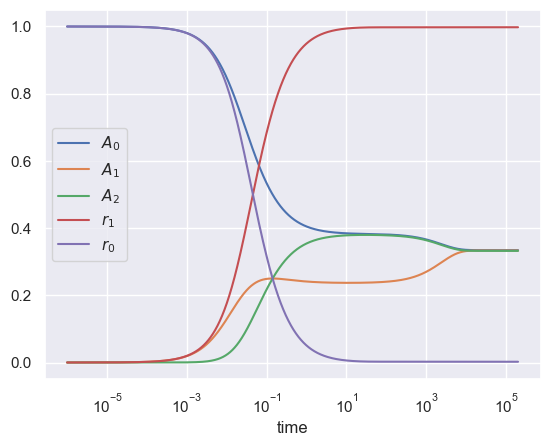

In [56]:
z = solve_ivp(model, t_span, z0, method="Radau", t_eval=t)

A1 = ((Amax0 - z.y[0] - z.y[1]))/Amax0
plt.semilogx(t, z.y[0]/Amax0, label =r'$A_0$')
plt.semilogx(t, A1, label = r'$A_1$')
plt.semilogx(t, z.y[1]/Amax0, label =r'$A_2$')
plt.semilogx(t, z.y[2]/rmax0, label = r'$r_1$')
plt.semilogx(t, (rmax0- z.y[2])/rmax0, label = r'$r_0$')
plt.xlabel('time')
plt.legend()
plt.show()

In [57]:
A0 = z.y[2]/rmax0
print(A0[-1])

0.9977701615903608


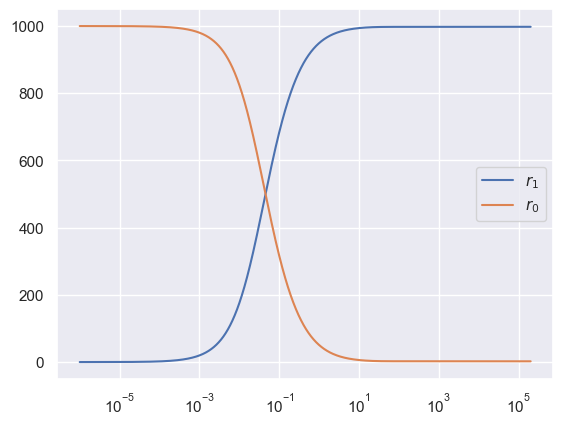

In [58]:
plt.semilogx(t, z.y[2], label = r'$r_1$')
plt.semilogx(t, (rmax0- z.y[2]), label = r'$r_0$')
plt.legend()
plt.show()

In [59]:
r1 = z.y[2]
print(r1[-1])


997.7701615903608


In [60]:
def bindings(i, n, s):
    s = int(s)
    i = int(i)
    #coeff = np.math.factorial(s)//(np.math.factorial(i)*np.math.factorial(s-i))
    return comb(s, i)*(n**i)*((1-n)**(s-i))

def calc_distribution(ints, n, s):

    probs = []

    for i in ints:
        probs.append(bindings(i, n, s))
    
    return probs

/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_862/4042118486.py:5: RuntimeWarning: overflow encountered in double_scalars
  return comb(s, i)*(n**i)*((1-n)**(s-i))


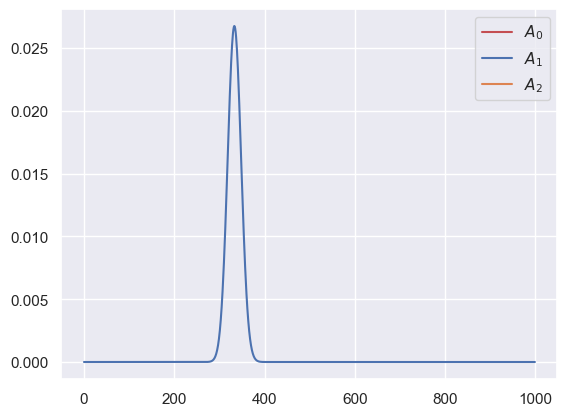

In [61]:
A0 = z.y[0]/10000
A2 = z.y[1]/10000

n = A0[-1]
m = A1[-1]
p = A2[-1]

s = 1e3
ints = np.arange(0, s)

list = [n, m, p]
y = []

for val in list:
    y.append(calc_distribution(ints, val, s))


plt.plot(ints, y[0], label = r'$A_0$', color = 'r')
plt.plot(ints, y[1], label = r'$A_1$')
plt.plot(ints, y[2], label = r'$A_2$', )
plt.legend()
plt.show()

In [62]:
print(n*s, m*s, p*s)

3344.4978771992246 333.33203587432627 3322.1817640575127


In [63]:
def sink_model(t, z):
    dA0 = -2*k*(1 - (z[2]/z[3]))*(z[0])*((z[3] - (z[2]))/z[3]) + koff*((z[4]- (z[0]) - (z[1])))*(z[2]/z[3])
    dA2 = k*(1 - (z[2]/z[3]))*delta*((z[4] - (z[0]) - (z[1])))*((z[3]-(z[2]))/z[3]) - 2*koff*(z[1])*(z[2]/z[3])
    dr1 = 2*k*(1 - (z[2]/z[3]))*(z[0]/z[4])*((z[3]-(z[2]))) - koff*((z[4] - (z[0]) - (z[1]))/z[4])*(z[2]) + k*delta*(1 - (z[2]/z[3]))*((z[4]-(z[0])-(z[1]))/z[4])*((z[3]-(z[2]))) - 2*koff*(z[0]/z[4])*(z[2]) - (gamma2*z[2]*(z[4] - z[0] - z[1])/z[4])
    drmax = -gamma1*(z[3] - z[2]) - (gamma2*z[2]*(z[4] - z[0] - z[1])/Amax0)
    dAmax = - gamma2*z[2]*(z[4] - z[0] - z[1])/rmax0

    return [dA0, dA2, dr1, drmax, dAmax]

[999.99999999 999.99999999 999.99999999 ... 602.88901673 602.25864708
 601.62792336]


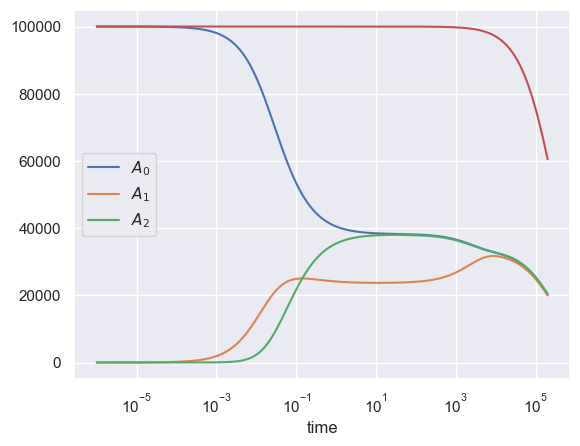

In [64]:
z = solve_ivp(sink_model, t_span, z01, method="Radau", t_eval=t)
Amax = z.y[4]
A1 = ((Amax - z.y[0] - z.y[1]))
print(z.y[3])
plt.semilogx(t, z.y[0], label =r'$A_0$')
plt.semilogx(t, A1, label = r'$A_1$')
plt.semilogx(t, z.y[1], label =r'$A_2$')
plt.semilogx(t, z.y[4])
plt.xlabel('time')
plt.legend()
plt.show()

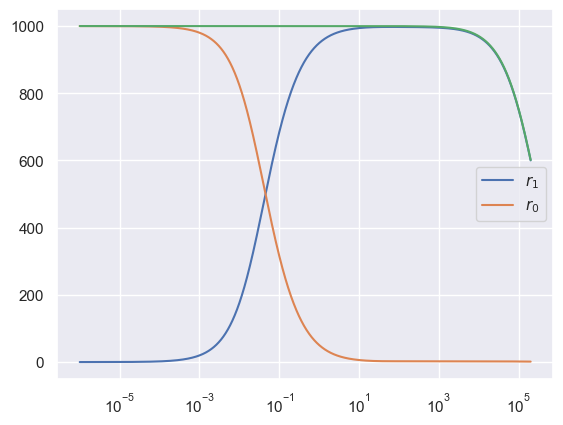

In [65]:
plt.semilogx(t, z.y[2], label = r'$r_1$')
plt.semilogx(t, (z.y[3]- z.y[2]), label = r'$r_0$')
plt.semilogx(t, z.y[3])
plt.legend()
plt.show()